# ¿Cómo hacemos gráficas en Python y para qué nos sirven?

Como hemos visto, ver los datos en una gráfica y no en una tabla nos puede ayudar a explorar nuestros datos. ¿Esto qué quiere decir? Podemos ver más fácilmente patrones, outliers, relaciones, y muchas cosas más. Es muy importante antes de realizar un modelo sólo por relizarlo conocer nuestros datos, y tratar de ver de forma muy descriptiva cómo es que las variables se relacionan entre ellas, e incluso los posibles problemas que pueda haber que quizá no vemos tan fácilmente en una tabla. 

### ¿Qué gráfica hago? Pues lo mismo de siempre... depende

Es importante que entendamos que existe una infinidad de gráficas que nos permiten ver distintos aspectos de los mimos datos. Nuestro mantra de vida para las gráficas.

https://datavizcatalogue.com/

UTILIDAD Y CLARIDAD > QUE SE VEA BONITO

(pero tampoco hay que hacer cosas espantosas. Un poquito de gusto no mata a nadie)

Vamos entonces a tratar de responder unas poquitas preguntas con gráficas:

Primero, vemos cómo están mis datos...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/sinais.csv', dtype = 'object')
data.head()

,inegi,year,NOM_ENT,NOM_MUN,pob,ent,mun,hom_tot,thom
0,01001,1990,Aguascalientes,Aguascalientes,506274.0,01,001,33.0,6.52
1,01001,1991,Aguascalientes,Aguascalientes,521585.0,01,001,44.0,8.44
2,01001,1992,Aguascalientes,Aguascalientes,536895.0,01,001,25.0,4.66
3,01001,1993,Aguascalientes,Aguascalientes,552206.0,01,001,25.0,4.53
4,01001,1994,Aguascalientes,Aguascalientes,567516.0,01,001,18.0,3.17


In [3]:
# ver tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67315 entries, 0 to 67314
Data columns (total 9 columns):
inegi      67315 non-null object
year       67315 non-null object
NOM_ENT    67315 non-null object
NOM_MUN    67315 non-null object
pob        66676 non-null object
ent        39593 non-null object
mun        39593 non-null object
hom_tot    67315 non-null object
thom       66676 non-null object
dtypes: object(9)
memory usage: 4.6+ MB


In [4]:
# convertir a numéricos
data[['pob', 'hom_tot', 'thom']] = data[['pob', 'hom_tot', 'thom']].apply(pd.to_numeric)
data.head()

,inegi,year,NOM_ENT,NOM_MUN,pob,ent,mun,hom_tot,thom
0,01001,1990,Aguascalientes,Aguascalientes,506274.0,01,001,33.0,6.52
1,01001,1991,Aguascalientes,Aguascalientes,521585.0,01,001,44.0,8.44
2,01001,1992,Aguascalientes,Aguascalientes,536895.0,01,001,25.0,4.66
3,01001,1993,Aguascalientes,Aguascalientes,552206.0,01,001,25.0,4.53
4,01001,1994,Aguascalientes,Aguascalientes,567516.0,01,001,18.0,3.17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67315 entries, 0 to 67314
Data columns (total 9 columns):
inegi      67315 non-null object
year       67315 non-null object
NOM_ENT    67315 non-null object
NOM_MUN    67315 non-null object
pob        66676 non-null float64
ent        39593 non-null object
mun        39593 non-null object
hom_tot    67315 non-null float64
thom       66676 non-null float64
dtypes: float64(3), object(6)
memory usage: 4.6+ MB


#### 1) ¿Cómo se ha movido la violencia en México a lo largo del tiempo?

Tengo en mi base observaciones de municipio por año, así que... agrupamos por año y calculamos la tasa de homicidios de cada año.

In [23]:
nac = data.copy()

In [24]:
nac = nac.groupby(['year']).sum()[['pob', 'hom_tot']] # agrupamos por año y sumamos poblaciones y totales
nac['thom'] = round((nac['hom_tot']/nac['pob'])*100000, 2) # calculamos tasa de homicidios por año
nac = nac.reset_index()

nac.head()

,year,pob,hom_tot,thom
0,1990,84392676.0,15114.0,17.91
1,1991,88666587.0,16878.0,19.04
2,1992,114903879.0,24401.0,21.24
3,1993,113221372.0,23089.0,20.39
4,1994,118669472.0,23426.0,19.74


Si tenemos datos que cambian sobre el tiempo... ¿qué gráficas podemos hacer?

[Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016')]

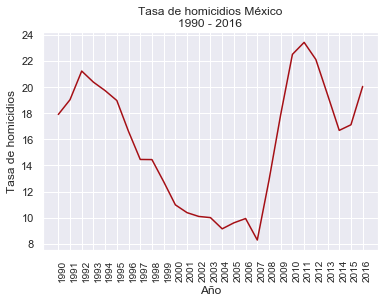

In [25]:
# TIMELINE
sns.set(style="darkgrid") # Nomás para darle poquito estilo

gr = sns.lineplot(x="year", y="thom", color = '#a50f15', data=nac)
gr.set(title = 'Tasa de homicidios México\n1990 - 2016', xlabel='Año', ylabel='Tasa de homicidios')
gr.set_xticklabels(labels = nac["year"], rotation=90, size = 10, ha = 'left')

In [26]:
fig = gr.get_figure()
fig.set_size_inches(12, 8)
fig.savefig('../Graphs/gr1.png')

In [27]:
del nac
del gr

#### 2) ¿Todos los municipios son muy violentos? ¿O son sólo algunos? 

In [28]:
data16 = data.copy()
data16 = data[data.year == "2016"]

data16.head()

,inegi,year,NOM_ENT,NOM_MUN,pob,ent,mun,hom_tot,thom
26,01001,2016,Aguascalientes,Aguascalientes,875860.0,01,001,35.0,4.00
53,01002,2016,Aguascalientes,Asientos,49934.0,NaN,NaN,0.0,0.00
80,01003,2016,Aguascalientes,Calvillo,58267.0,01,003,4.0,6.86
107,01004,2016,Aguascalientes,Cosío,16378.0,NaN,NaN,0.0,0.00
134,01005,2016,Aguascalientes,Jesús María,113254.0,01,005,2.0,1.77


In [29]:
len(data16)

2457

[Text(0, 0.5, 'Densidad'),
 Text(0.5, 0, 'Tasa de homicidios'),
 Text(0.5, 1.0, 'Tasa de homicidios municipal 2016')]

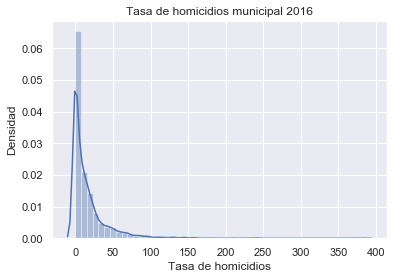

In [30]:
# DISTRIBUTION 
gr = sns.distplot(data16[['thom']])
gr.set(title = 'Tasa de homicidios municipal 2016', xlabel='Tasa de homicidios', ylabel='Densidad')

In [31]:
fig = gr.get_figure()
fig.set_size_inches(12, 8)
fig.savefig('../Graphs/gr2.png')

del gr
del data16

#### 3) ¿Cuáles fueron los estados más violentos en 2011?

In [32]:
edos = data.copy()
edos = edos[edos.year == "2011"]
edos.head()

,inegi,year,NOM_ENT,NOM_MUN,pob,ent,mun,hom_tot,thom
21,01001,2011,Aguascalientes,Aguascalientes,816822.0,01,001,71.0,8.69
48,01002,2011,Aguascalientes,Asientos,46638.0,01,002,1.0,2.14
75,01003,2011,Aguascalientes,Calvillo,55222.0,01,003,2.0,3.62
102,01004,2011,Aguascalientes,Cosío,15365.0,01,004,1.0,6.51
129,01005,2011,Aguascalientes,Jesús María,103038.0,01,005,4.0,3.88


In [33]:
edos['NOM_ENT'].isnull().value_counts()

False    2457
Name: NOM_ENT, dtype: int64

In [34]:
edos = edos.groupby(['NOM_ENT']).sum()[['pob', 'hom_tot']]
edos['thom'] = round((edos['hom_tot']/edos['pob'])*100000, 2)
edos = edos.reset_index()

edos.head()

,NOM_ENT,pob,hom_tot,thom
0,Aguascalientes,1215094.0,95.0,7.82
1,Baja California,3275399.0,810.0,24.73
2,Baja California Sur,672683.0,43.0,6.39
3,Campeche,852373.0,48.0,5.63
4,Chiapas,4980629.0,196.0,3.94


[Text(0, 0, 'Aguascalientes'),
 Text(0, 0, 'Baja California'),
 Text(0, 0, 'Baja California Sur'),
 Text(0, 0, 'Campeche'),
 Text(0, 0, 'Chiapas'),
 Text(0, 0, 'Chihuahua'),
 Text(0, 0, 'Coahuila de Zaragoza'),
 Text(0, 0, 'Colima'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Durango'),
 Text(0, 0, 'Guanajuato'),
 Text(0, 0, 'Guerrero'),
 Text(0, 0, 'Hidalgo'),
 Text(0, 0, 'Jalisco'),
 Text(0, 0, 'Michoacán de Ocampo'),
 Text(0, 0, 'Morelos'),
 Text(0, 0, 'México'),
 Text(0, 0, 'Nayarit'),
 Text(0, 0, 'Nuevo León'),
 Text(0, 0, 'Oaxaca'),
 Text(0, 0, 'Puebla'),
 Text(0, 0, 'Querétaro'),
 Text(0, 0, 'Quintana Roo'),
 Text(0, 0, 'San Luis Potosí'),
 Text(0, 0, 'Sinaloa'),
 Text(0, 0, 'Sonora'),
 Text(0, 0, 'Tabasco'),
 Text(0, 0, 'Tamaulipas'),
 Text(0, 0, 'Tlaxcala'),
 Text(0, 0, 'Veracruz de Ignacio de la Llave'),
 Text(0, 0, 'Yucatán'),
 Text(0, 0, 'Zacatecas')]

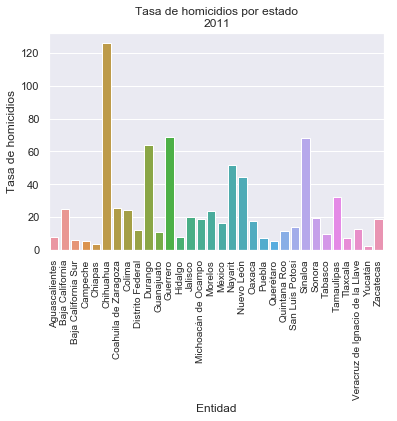

In [35]:
# BARPLOT
gr = sns.barplot(x="NOM_ENT", y="thom", data=edos)
gr.set(title = 'Tasa de homicidios por estado\n2011', 
       xlabel='Entidad', ylabel='Tasa de homicidios')
gr.set_xticklabels(labels = edos["NOM_ENT"], 
                   rotation=90, size = 10, ha = 'center')

In [36]:
# Ordenamos las columnas
result = edos.groupby(["NOM_ENT"])['thom'].aggregate(np.median).reset_index().sort_values('thom', ascending=False)
result

,NOM_ENT,thom
5,Chihuahua,126.07
11,Guerrero,68.75
24,Sinaloa,68.06
9,Durango,63.83
17,Nayarit,51.49
18,Nuevo León,44.57
27,Tamaulipas,32.43
6,Coahuila de Zaragoza,25.48
1,Baja California,24.73
7,Colima,24.54


[Text(0, 0, 'Chihuahua'),
 Text(0, 0, 'Guerrero'),
 Text(0, 0, 'Sinaloa'),
 Text(0, 0, 'Durango'),
 Text(0, 0, 'Nayarit'),
 Text(0, 0, 'Nuevo León'),
 Text(0, 0, 'Tamaulipas'),
 Text(0, 0, 'Coahuila de Zaragoza'),
 Text(0, 0, 'Baja California'),
 Text(0, 0, 'Colima'),
 Text(0, 0, 'Morelos'),
 Text(0, 0, 'Jalisco'),
 Text(0, 0, 'Sonora'),
 Text(0, 0, 'Zacatecas'),
 Text(0, 0, 'Michoacán de Ocampo'),
 Text(0, 0, 'Oaxaca'),
 Text(0, 0, 'México'),
 Text(0, 0, 'San Luis Potosí'),
 Text(0, 0, 'Veracruz de Ignacio de la Llave'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Quintana Roo'),
 Text(0, 0, 'Guanajuato'),
 Text(0, 0, 'Tabasco'),
 Text(0, 0, 'Aguascalientes'),
 Text(0, 0, 'Hidalgo'),
 Text(0, 0, 'Puebla'),
 Text(0, 0, 'Tlaxcala'),
 Text(0, 0, 'Baja California Sur'),
 Text(0, 0, 'Querétaro'),
 Text(0, 0, 'Campeche'),
 Text(0, 0, 'Chiapas'),
 Text(0, 0, 'Yucatán')]

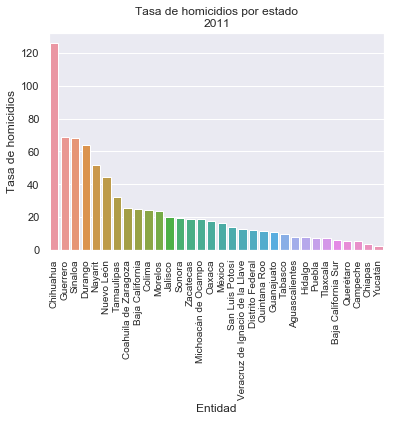

In [37]:
gr = sns.barplot(x="NOM_ENT", y="thom", order=result['NOM_ENT'], data=edos)
gr.set(title = 'Tasa de homicidios por estado\n2011', xlabel='Entidad', ylabel='Tasa de homicidios')
gr.set_xticklabels(labels = result['NOM_ENT'], rotation=90, size = 10, ha = 'center')

In [38]:
fig = gr.get_figure()
fig.set_size_inches(12, 10)
fig.savefig('../Graphs/gr3.png')

del gr
del edos

#### 4) ¿Coincide el año más violento nacional con el de todos los estados?

In [39]:
edos = data.copy()
edos = edos.groupby(['NOM_ENT', 'year']).sum()[['pob', 'hom_tot']]
edos['thom'] = round((edos['hom_tot']/edos['pob'])*100000, 2)
edos = edos.reset_index()

edos.head()

,NOM_ENT,year,pob,hom_tot,thom
0,Aguascalientes,1990,719659.0,42.0,5.84
1,Aguascalientes,1991,741849.0,53.0,7.14
2,Aguascalientes,1992,764038.0,35.0,4.58
3,Aguascalientes,1993,786227.0,33.0,4.20
4,Aguascalientes,1994,808416.0,23.0,2.85


[Text(138.5, 0.5, 'Año'),
 Text(0.5, 48.453125, 'Entidad'),
 Text(0.5, 1.0, 'Tasa de homicidios por estado y año')]

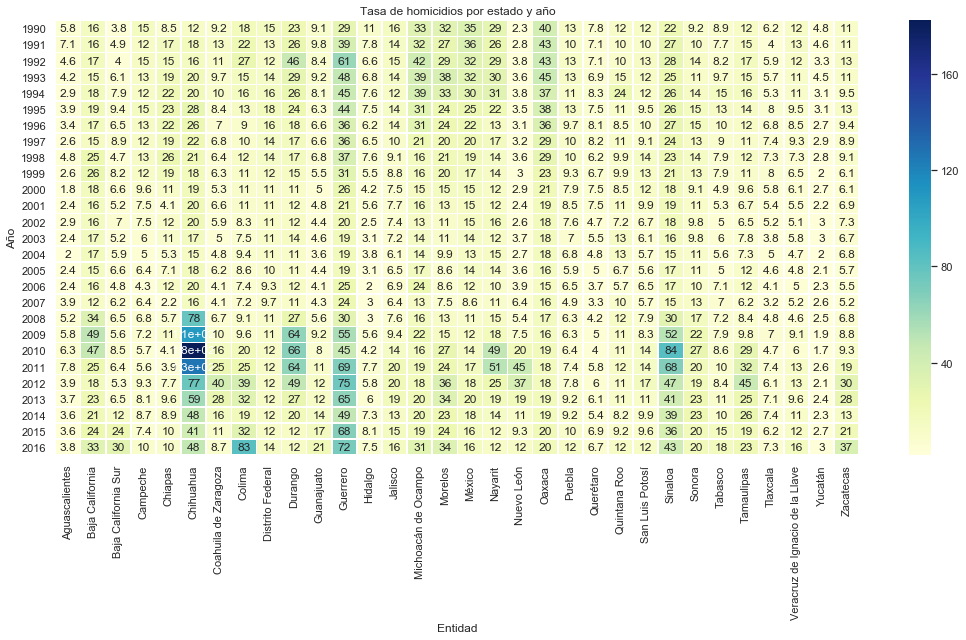

In [40]:
variables = edos.pivot("year", "NOM_ENT", "thom")

# HEATMAP 
plt.figure(figsize = (18,8))
ax = sns.heatmap(variables, annot=True, cmap="YlGnBu", linewidths=.5)
ax.set(title = 'Tasa de homicidios por estado y año', xlabel='Entidad', ylabel='Año')

In [41]:
fig = ax.get_figure()
fig.set_size_inches(18, 8)
fig.savefig('../Graphs/gr4.png')

del ax
del edos

#### 5) ¿Son los municipios con más gente los que tienen más homicidios?

[Text(0, 0.5, 'Tasa de homicidios'),
 Text(0.5, 0, 'Total de homicidios'),
 Text(0.5, 1.0, 'Tasa de homicidios vs Total de homicidios\nPor municipio 2016')]

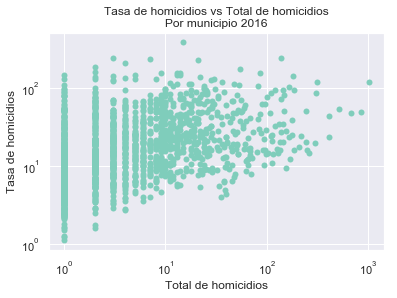

In [42]:
data16 = data.copy()
data16 = data[data.year == "2016"]

# SCATTER
fig = plt.figure()
ax = plt.gca()
ax.plot(data16['hom_tot'], data16['thom'], 'o', c='#7fcdbb', markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set(title = 'Tasa de homicidios vs Total de homicidios\nPor municipio 2016', xlabel='Total de homicidios', ylabel='Tasa de homicidios')

In [43]:
fig = ax.get_figure()
fig.set_size_inches(12, 12)
fig.savefig('../Graphs/gr5.png')

del ax
del data16

#### 6) ¿Qué porcentaje de los homicidios desde 1990 han sucedido en cada año?

In [44]:
pct = data.copy()
pct = pct[pct.year == '2011']
pct = pct.groupby(['NOM_ENT']).sum()[['hom_tot']]
pct = pct.reset_index()
pct['total'] = pct['hom_tot'].sum()
pct['porcentaje'] = round((pct['hom_tot']/pct['total'])*100, 1)
pct.sort_values('porcentaje', ascending = False)

,NOM_ENT,hom_tot,total,porcentaje
5,Chihuahua,4487.0,27113.0,16.5
16,México,2626.0,27113.0,9.7
11,Guerrero,2388.0,27113.0,8.8
18,Nuevo León,2138.0,27113.0,7.9
24,Sinaloa,1959.0,27113.0,7.2
13,Jalisco,1521.0,27113.0,5.6
27,Tamaulipas,1095.0,27113.0,4.0
8,Distrito Federal,1091.0,27113.0,4.0
9,Durango,1079.0,27113.0,4.0
29,Veracruz de Ignacio de la Llave,999.0,27113.0,3.7


In [45]:
# TREEMAP
# pip install squarify
import squarify

[Text(0.5, 1.0, 'Porcentaje de homicidios por año')]

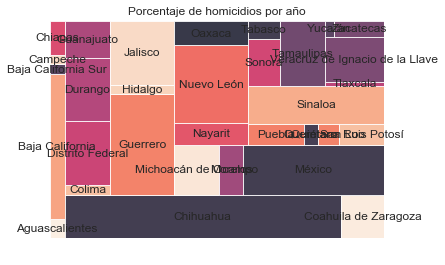

In [46]:
plt = squarify.plot(sizes=pct['porcentaje'], label=pct['NOM_ENT'], alpha=.8 )
plt.axis('off')
plt.set(title = 'Porcentaje de homicidios por año')

In [47]:
fig = plt.get_figure()
fig.set_size_inches(12, 12)
fig.savefig('../Graphs/gr6.png')